In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import geopandas as gpd
import json

import matplotlib.pyplot as plt
import geoplot as gplt
import altair as alt

### DATA

In [2]:
#cps_df = pd.read_csv("../Data/CPS_OUTCOMES_2017.csv" , dtype={'School_ID':str})
#cps_df = cps_df[['School_ID', 'Long_Name', 'School_Latitude', 'School_Longitude', 
#                 'dropout_rates', 'graduation_only', 'enrollment_only', 'persistence_rates', 'other_rates']]

# School Crimes Data
school_crimes = gpd.read_file('../Data/SCHOOL_CRIMES.geojson')

# Chicago data for region clipping
chicago = gpd.read_file('../Data/Boundaries - City.geojson')

# Voronoi boundaries 
voronoi = gpd.read_file('../Data/voronois.geojson')

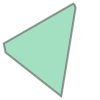

In [12]:
voronoi.loc[18, 'geometry']

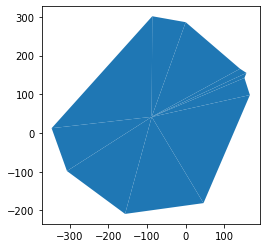

In [10]:
voronoi.plot()

In [20]:
print(chicago.crs)
print(voronoi.crs)

epsg:4326
epsg:4326


In [ ]:
chicago_clipped = gpd.clip(chicago, polygon)

# Plot the clipped data
# The plot below shows the results of the clip function applied to the world
# sphinx_gallery_thumbnail_number = 2
fig, ax = plt.subplots(figsize=(12, 8))
world_clipped.plot(ax=ax, color="purple")
world.boundary.plot(ax=ax)
poly_gdf.boundary.plot(ax=ax, color="red")
ax.set_title("World Clipped", fontsize=20)
ax.set_axis_off()
plt.show()

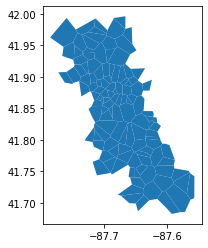

In [58]:
voronoi_chicago = gpd.sjoin(voronoi, chicago, how="inner", op='within')
#voronoi_chicago.head()
voronoi_chicago.plot()

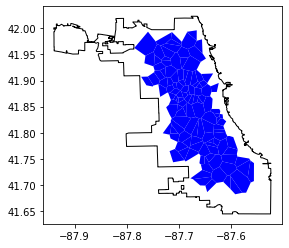

In [56]:
ax = chicago.plot(color='white', edgecolor='black')
voronoi_chicago.plot(ax=ax, color='blue')
plt.show()

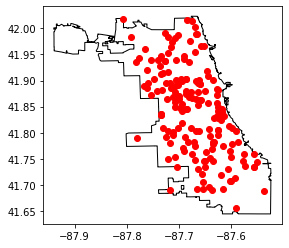

In [21]:
# We restrict to South America.
ax = chicago.plot(
    color='white', edgecolor='black')

# We can now plot our ``GeoDataFrame``.
school_crimes.plot(ax=ax, color='red')

plt.show()

In [4]:
print(type(school_crimes))
school_crimes

<class 'geopandas.geodataframe.GeoDataFrame'>


id                                          Long_Name School_ID  \
0      0                        Sarah E. Goode STEM Academy    610558   
1      1                 Simpson Academy HS for Young Women    609750   
2      2                            Ombudsman Chicago- West    610571   
3      3                    Consuella B York Alternative HS    609748   
4      4                            Back of the Yards IB HS    610563   
5      5     Urban Prep Academy for Young Men - Bronzeville    400105   
6      6       TEAM Englewood Community Academy High School    610506   
7      7                       ACE Technical Charter School    400010   
8      8                         Legal Prep Charter Academy    400119   
9      9                            Orr Academy High School    610389   
10    10           Perspectives - High School of Technology    400062   
11    11         YCCS- Academy of Scholastic Achievement HS    400123   
12    12           Frederick A Douglass Academy High School    610245   
13    13                         John F Kennedy High School    609718   
14    14         Hyman G Rickover Naval Academy High School    610390   
15    15        Benito Juarez Community Academy High School    609764   
16    16           Neal F Simeon Career Academy High School    609692   
17    17                    Magic Johnson- Humboldt Park HS    610580   
18    18      Chicago Vocational Career Academy High School    609674   
19    19                        Noble - Butler College Prep    400156   
20    20  Acero Charter Schools - Major Hector P. Garcia MD    400085   
21    21                   Eric Solorio Academy High School    610543   
22    22    Marie Sklodowska Curie Metropolitan High School    609756   
23    23                 Noble - Chicago Bulls College Prep    400097   
24    24                 YCCS-West Town Acad Alternative HS    400143   
25    25                   EPIC Academy Charter High School    400094   
26    26          Edward Tilden Career Community Academy HS    609735   
27    27      YCCS-Community Youth Development Institute HS    400130   
28    28       George Washington Carver Military Academy HS    609760   
29    29                Wells Community Academy High School    609740   
..   ...                                                ...       ...   
144  144                    Noble - Gary Comer College Prep    400052   
145  145           North Lawndale College Prep - Christiana    400058   
146  146       Noble - John and Eunice Johnson College Prep    400106   
147  147                            Morgan Park High School    609725   
148  148               Christian Fenger Academy High School    609705   
149  149           Instituto Health Sciences Career Academy    400104   
150  150   Charles Allen Prosser Career Academy High School    609679   
151  151                    Ogden International High School    610529   
152  152       Daniel Hale Williams Prep School of Medicine    610380   
153  153          South Shore Intl College Prep High School    610547   
154  154    Greater Lawndale High School For Social Justice    610383   
155  155                    Pathways in Education- Avondale    610568   
156  156        Noble - Rowe-Clark Math and Science Academy    400056   
157  157                     Noble - Hansberry College Prep    400117   
158  158                                Excel - Woodlawn HS    400175   
159  159             Chicago Technology Academy High School    400091   
160  160    Friedrich W von Steuben Metropolitan Science HS    609737   
161  161                           Lincoln Park High School    609738   
162  162      Walter Payton College Preparatory High School    609680   
163  163                   Magic Johnson- North Lawndale HS    610566   
164  164          YCCS-Westside Holistic Leadership Acad HS    400144   
165  165                  William Rainey Harper High School    609711   
166  166       Urban Prep Academy for Young Men - Englewood    4

In [88]:
#from geopandas import GeoSeries
#from shapely.geometry import Point
pts = GeoSeries([Point(x, y) for x, y in zip(school_crimes.School_Latitude, school_crimes.School_Longitude)])
#pts = np.array(list(zip(school_crimes.School_Latitude, school_crimes.School_Longitude)))
circles = pts.buffer(10000)
mp = circles.unary_union
holes = chicago['geometry'].intersection(mp)

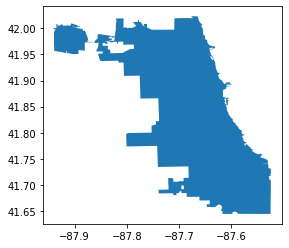

In [89]:
holes.plot()

In [125]:
selector = alt.selection_single(empty='all', fields=['School_ID'])

# Base data
base = alt.Chart(school_crimes).properties(
    width=300,
    height=250
).add_selection(selector)

# Chicago background
background = alt.Chart(chicago).mark_geoshape(
    fill='lightgray',
    stroke='white'
).properties(
    width=300,
    height=250
).project('albersUsa')

# CPS positions
points = base.mark_circle().encode(
    longitude='School_Longitude:Q',
    latitude='School_Latitude:Q',
    size=alt.Size('total_crimes:Q', title='Number of Crimes Near School'),
    color=alt.condition(selector, 'School_ID:O', alt.value('steelblue'), legend=None),
    tooltip=['Long_Name:N','total_crimes:Q']
).properties(
    title='Number of Crimes Nearest Each Chicago Public Schools'
).transform_filter(
    selector
)

# Chart
scatterplot = base.mark_point().encode(
    x='total_crimes',
    y=alt.Y('persistence_rates', scale=alt.Scale(domain=(0, 1))),
    color=alt.Color('School_ID:O', legend=None)
).transform_filter(
    selector
)

background + points | scatterplot

#background + points

alt.HConcatChart(...)

In [ ]:
color = alt.condition(selection,
                      alt.Color('Origin:N', legend=None),
                      alt.value('lightgray'))

scatter = alt.Chart(cars).mark_point().encode(
    x='Horsepower:Q',
    y='Miles_per_Gallon:Q',
    color=color,
    tooltip='Name:N'
)

legend = alt.Chart(cars).mark_rect().encode(
    y=alt.Y('Origin:N', axis=alt.Axis(orient='right')),
    x='Cylinders:O',
    color=color
).add_selection(
    selection
)

scatter | legend

In [116]:
#np.random.seed(0)

#n_objects = 20
#n_times = 50

# Create one (x, y) pair of metadata per object
#locations = pd.DataFrame({
#    'id': range(n_objects),
#    'x': np.random.randn(n_objects),
#    'y': np.random.randn(n_objects)
#})

# Create a 50-element time-series for each object
#timeseries = pd.DataFrame(np.random.randn(n_times, n_objects).cumsum(0),
#                          columns=locations['id'],
#                          index=pd.RangeIndex(0, n_times, name='time'))

# Melt the wide-form timeseries into a long-form view
#timeseries = timeseries.reset_index().melt('time')

# Merge the (x, y) metadata into the long-form view
#timeseries['id'] = timeseries['id'].astype(int)  # make merge not complain
#data = pd.merge(timeseries, locations, on='id')

# Data is prepared, now make a chart

selector = alt.selection_single(empty='all', fields=['School_Id'])

base = alt.Chart(school_crimes).properties(
    width=250,
    height=250
).add_selection(selector)

points = base.mark_point(filled=True, size=200).encode(
    x='total_crimes',
    y='graduation_only',
    color=alt.condition(selector, 'School_Id:O', alt.value('lightgray'), legend=None),
)

timeseries = base.mark_line().encode(
    x='total_crimes',
    y=alt.Y('persistence_rates', scale=alt.Scale(domain=(0, 1))),
    color=alt.Color('School_Id:O', legend=None)
).transform_filter(
    selector
)

points | timeseries

alt.HConcatChart(...)

#### Prep Data to be Used for Altair

Following steps adapted from: https://www.districtdatalabs.com/altair-choropleth-viz
- ***gen_geojson function***
- ***gen_map function***

In [15]:
# Convert GeoPandas df back to GeoJson
def gen_geojson(geodataframe):
  ''' Converts GeoPandas dataframe back to GeoJson file that Altair can use for maps'''
  #choro_json = json.loads(geodataframe.to_json())
  #choro_data = alt.Data(values=choro_json['features'])
  data  = alt.InlineData(values = geodataframe.to_json(),
                                format = alt.DataFormat(property='features',
                                                        type='json'))
  return data

In [108]:
# Generate map
def gen_map(basemap, geodata, color_column, title, subtitle):
    '''Generates map with crime choropleth and community area labels'''
    # Add Base Layer
    base = alt.Chart(basemap).mark_geoshape(
        stroke='black',
        strokeWidth=1
    ).encode(
    ).properties(
        width=400,
        height=400,
        title={
        "text": title, 
        "subtitle": subtitle,
        "color": "#069695",
        "subtitleColor": "#7854b3",
        }
    )
    # Add Choropleth Layer
    choro = alt.Chart(geodata).mark_geoshape(
        stroke='black'
    ).encode(
        color=alt.Color(color_column, 
                  type='quantitative', 
                  #scale=alt.Scale(scheme='bluegreen'),
                  title = "Crime Counts")
    )
    # Add Labels Layer
    labels = alt.Chart(geodata).mark_text(baseline='top'
     ).properties(
        width=400,
        height=400
     ).encode(
         longitude='properties.School_Longitude:Q',
         latitude='properties.School_Latitude:Q',
         #text='properties.Long_Name:O',
         size=alt.value(8),
         opacity=alt.value(1)
     )

    return base + choro + labels

#### Maps

In [109]:
choro_data = gen_geojson(school_crimes)
crime_2018_map = gen_map(chicago, geodata=choro_data, color_column='properties.total_crimes', 
                         title='Crime Count by Proximity to Chicago Public School',
                         subtitle='[Source: City of Chicago Data Portal on Crimes]')
crime_2018_map

alt.LayerChart(...)